In [ ]:
import os

path = f'/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622'

for root, dirs, files in os.walk(path):
    print(f'root: {root}')
    print(f'dirs: {dirs}')
    print(f'files: {files}')
    for i in files:
        if i in ['class1.tif', 'class2.tif', 'class3.tif', 'class4.tif']:
            print('yes')


root: /home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622
dirs: []
files: ['class4.tif', 'class1.tif', 'image.tif', 'class2.tif']
yes
yes
yes


In [ ]:
print(os.listdir(path))

['class4.tif', 'class1.tif', 'image.tif', 'class2.tif']


In [14]:
import skimage.io as sio
import numpy as np
a = sio.imread('/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622/class1.tif')
print(np.array(a).shape)

import cv2
b = cv2.imread('/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622/image.tif')
print(np.array(b).shape)
print(b.shape[:2])

c = cv2.imread('/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622/class1.tif', cv2.IMREAD_UNCHANGED)
print(c.shape)

(935, 447)
(935, 447, 3)
(935, 447)
(935, 447)


In [17]:
import re
from pathlib import Path
mask_path = Path('/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622/class1.tif')
m = re.search(r"class(\d+)\.tif", mask_path.name)
# if not m:
#     continue
class_ = int(m.group(1))
# if class_ > NUM_CLASSES:
#     continue
# record["annotations"] += _annos_from_mask(mask_path, class_ - 1)
# anno += _annos_from_mask(mask_path, class_ - 1)

from pycocotools import mask as mask_utils
import skimage.io as sio

mask = sio.imread(str(mask_path))
# img = cv2.imread(str(mask_path), cv2.IMREAD_UNCHANGED)
# if mask.ndim > 2:
#     mask = mask[..., 0]
tmp = []
for value in np.unique(mask):
    if value == 0:
        continue
    # bin_mask = (img == inst_id).astype(np.uint8)
    bin_mask = (mask == value).astype(np.uint8)#.copy()
    ys, xs = np.where(bin_mask)
    x0, y0, x1, y1 = xs.min(), ys.min(), xs.max(), ys.max()
    rle = mask_utils.encode(np.asfortranarray(bin_mask))
    rle["counts"] = rle["counts"].decode("ascii")
    tmp.append(
        {
            "bbox": [int(x0), int(y0), int(x1), int(y1)],
            # "bbox_mode": BoxMode.XYXY_ABS,
            "segmentation": rle,
            "category_id": class_ - 1,
            "iscrowd": 0,
        }
    )

In [19]:
print(tmp)

[{'bbox': [59, 53, 86, 92], 'segmentation': {'size': [935, 447], 'counts': 'Zne18ml03L5L4L3N2M2N2N2O1O2O0N11O0O1O2M2O2O0O2O100O1O3M2N2M3JSeX:'}, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2, 134, 26, 174], 'segmentation': {'size': [935, 447], 'counts': 'do19kl03N2LC]SO>Vl0`0N2N2O010O001O001O01O1O1O1N2O1O2M3O2L4M4Ia[o;'}, 'category_id': 0, 'iscrowd': 0}]


In [ ]:
a=[1,2,3]
b=[4,5,6]
a.append(b)
print(a)
c=a+b
print(c)

[1, 2, 3, [4, 5, 6]]
[1, 2, 3, [4, 5, 6], 4, 5, 6]


In [ ]:
a = 'class1.tif'
mask_path = a.glob("class*.tif")
m = re.search(r"class(\d+)\.tif", mask_path.name)


In [ ]:
import pathlib

path = pathlib.Path(path)

a =  [
    entry.name for entry in path.iterdir()
    if entry.name.startswith("class") and entry.is_file()
]

print(a)

['class4.tif', 'class1.tif', 'class2.tif']


In [ ]:
a = f'/home/bhg/visual_dl/lab3/dataset/train/ed099e4d-89d2-4579-bd08-80dd26ebdb9e/class3.tif'
import skimage.io as sio
mask = sio.imread(a)

print(mask.shape)

output= []
for i in mask:
    print(i)
    for j in i:
        if j not in output:
            output.append(float(j))
print(output)


(264, 241)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
samples = []
root= os.path.join('../', 'dataset/train')
for img_dir in os.listdir(root):
    tmp_dir = os.path.join(root, img_dir)

    # if not self.is_test:
    img_path = os.path.join(tmp_dir, 'image.tif')
    
    mask_paths = [
        entry.name for entry in pathlib.Path(tmp_dir).iterdir()
        if entry.name.startswith("class") and entry.is_file()
    ]

    samples.append({'image': img_path, 'masks': mask_paths})
print(samples[0])

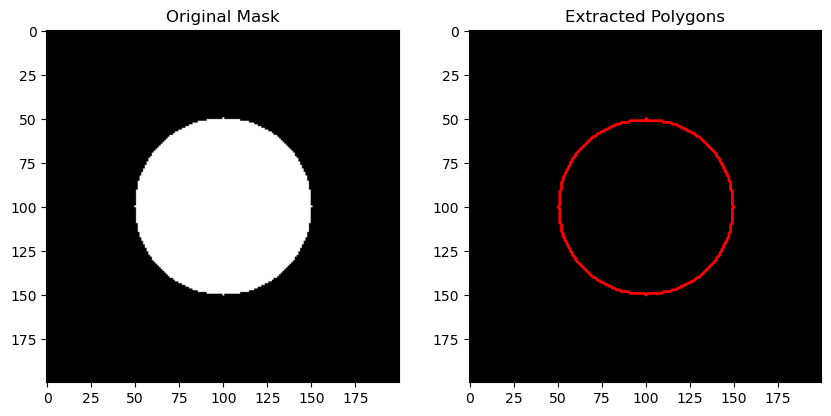

找到 1 個多邊形
第一個多邊形前5個座標點：
[100, 50, 99, 51, 91, 51, 90, 52, 86, 52]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mask_to_polygons(mask, epsilon=1.0):
    """將二值遮罩轉換為多邊形頂點列表
    
    Args:
        mask (numpy.ndarray): 二值化圖像 (0/255)
        epsilon (float): 多邊形近似精度參數 (當前代碼未使用)
    
    Returns:
        list: 多邊形頂點列表 [[x1,y1,x2,y2,...], ...]
    """
    contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        if len(contour) > 2:
            poly = contour.reshape(-1).tolist()
            if len(poly) > 4:  # 至少需要2個點才能構成多邊形
                polygons.append(poly)
    return polygons

# --------------------------
# 示例使用
# --------------------------
# 創建測試用二值遮罩 (200x200 像素)
mask = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(mask, (100, 100), 50, 255, -1)  # 繪製白色圓形

# 提取多邊形
polygons = mask_to_polygons(mask)

# --------------------------
# 可視化結果
# --------------------------
plt.figure(figsize=(10, 5))

# 原始遮罩
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Original Mask')

# 多邊形繪製
plt.subplot(1, 2, 2)
plt.imshow(np.zeros_like(mask), cmap='gray')
for poly in polygons:
    # 將一維列表轉換為二維座標點
    points = np.array(poly).reshape(-1, 2)
    # 繪製多邊形邊界
    plt.plot(points[:,0], points[:,1], 'r-', linewidth=2)
    # 連接首尾點形成閉合區域
    plt.plot([points[-1,0], points[0,0]], 
             [points[-1,1], points[0,1]], 'r-', linewidth=2)
plt.title('Extracted Polygons')
plt.show()

# --------------------------
# 輸出解析
# --------------------------
print(f"找到 {len(polygons)} 個多邊形")
print("第一個多邊形前5個座標點：")
print(polygons[0][:10])  # 展示前5個x,y座標 (即前10個元素)

In [ ]:
target = {
    "boxes": torch.tensor([
        [100, 120, 300, 400],    # 實例1邊界框
        [400, 50, 550, 200]      # 實例2邊界框
    ], dtype=torch.float32),
    
    "labels": torch.tensor([1, 3], dtype=torch.int64),  # 類別標籤
    
    "masks": torch.stack([
        torch.zeros(600,800).bernoulli_(0.1),  # 實例1掩碼
        torch.zeros(600,800).bernoulli_(0.3)   # 實例2掩碼
    ]).byte()
}

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

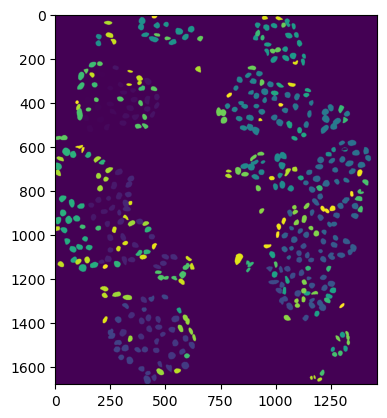

: 

In [ ]:
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np

mask_path=f'/home/bhg/visual_dl/lab3/dataset/train/4da4fe48-2c18-437c-894c-d3af27b99de3/class1.tif'
mask = sio.imread(mask_path)
labels = np.unique(mask)
print(labels)
plt.imshow(mask)

res = {}

masks = []
ls = []
for label in labels:
    if label == 0:
        continue
        
    tmp = np.zeros_like(mask)
    tmp[mask == label] = 1
    masks.append(tmp)
    ls.append(label)

res['mask'] = masks
res['label'] = ls
print(res)

In [ ]:
k = f'/home/bhg/visual_dl/lab3/dataset/train/4da4fe48-2c18-437c-894c-d3af27b99de3/image.tif'
import cv2
img = cv2.imread(k)
print(img.shape)

(1678, 1463, 3)


In [ ]:
import numpy as np
a = [[0,1,2], [2,3,4]]
b = np.concatenate(a).tolist()

print(b)

NameError: name 'np' is not defined

In [ ]:
a = [1,2,3]

for i, j in enumerate(a):
    print(f'{i} {j}')

0 1
1 2
2 3


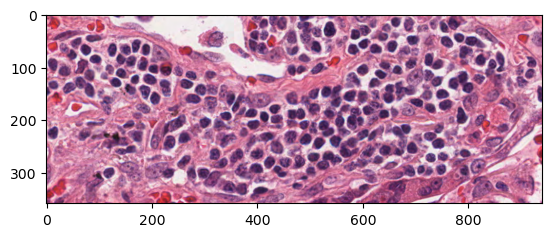

In [9]:
from matplotlib import pyplot as plt
img='../dataset/train/9482ac38-d252-41bd-b93e-1e5d779585f3/image.tif'
plt.imshow(cv2.imread(img))
plt.show()

In [ ]:
from pycocotools.coco import COCO as cc
a = cc('/home/bhg/visual_dl/lab3/dataset/train_coco.json')

img_id = a.getImgIds(imgIds=0)
dd = a.loadImgs(img_id)
print(dd)
size = [dd[0]['height'], dd[0]['width']]
print(size)

ann_ids = a.getAnnIds(imgIds=0)
annotations = a.loadAnns(ann_ids)
print(annotations)

seg = annotations[0]['segmentation']
seg

from pycocotools import mask as coco_mask
import numpy as np

def poly2mask(segmentation, img_size):
    """
    多邊形標註轉二值掩碼
    :param segmentation: COCO格式的多邊形坐標列表 [[x1,y1,x2,y2,...]]
    :param img_size: 目標圖像尺寸 (height, width)
    """
    # 自動檢測標註類型
    if isinstance(segmentation, dict):
        # 處理RLE格式
        return coco_mask.decode(segmentation)
    else:
        # 處理多邊形格式
        rle = coco_mask.frPyObjects(segmentation, img_size[0], img_size[1])
        return coco_mask.decode(rle)
b = poly2mask(seg, size)
b




loading annotations into memory...
Done (t=2.85s)
creating index...
index created!
[{'id': 0, 'file_name': '../dataset/train/792c2aff-8a9d-41dc-a3e6-af44c7226a1e/image.tif', 'height': 424, 'width': 684}]
[424, 684]
[{'id': 1, 'image_id': 0, 'category_id': 1, 'segmentation': [[266, 266, 265, 267, 263, 267, 259, 271, 259, 272, 257, 274, 256, 274, 256, 275, 255, 276, 255, 277, 254, 278, 254, 279, 253, 280, 253, 281, 251, 283, 251, 284, 250, 285, 250, 291, 251, 291, 252, 292, 254, 292, 255, 291, 256, 291, 257, 290, 258, 290, 259, 289, 260, 289, 264, 285, 265, 285, 268, 282, 269, 282, 271, 280, 271, 279, 272, 278, 272, 277, 274, 275, 274, 274, 275, 273, 275, 268, 274, 267, 273, 267, 272, 266]], 'area': 365.0, 'bbox': [250, 266, 26, 27], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 1, 'segmentation': [[280, 361, 279, 362, 277, 362, 275, 364, 274, 364, 273, 365, 272, 365, 271, 366, 270, 366, 268, 368, 267, 368, 267, 369, 265, 371, 264, 371, 263, 372, 263, 373, 260, 376, 259, 376, 25

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [8]:
import torch.nn.functional as F
import cv2
b = cv2.resize(
    b, 
    (224, 224), 
    interpolation=cv2.INTER_NEAREST_EXACT  # 精確最近鄰算法
)

if b.any() not in [0,1]:
    print("no")

In [4]:
from pycocotools.coco import COCO
import json

coco_file=[]
with open('/home/bhg/visual_dl/lab3/dataset/test_image_name_to_ids.json', 'r') as f:
    coco_file = json.load(f)

index = 0
print(coco_file[0])

{'file_name': 'c8cb7626-7423-4c1e-a81c-5ff25ea180b3.tif', 'id': 1, 'height': 446, 'width': 512}


In [38]:
c = a.getCatIds()
cc = a.loadCats(c)
cc

[{'id': 1, 'name': 0},
 {'id': 2, 'name': 1},
 {'id': 3, 'name': 2},
 {'id': 4, 'name': 3},
 {'id': 5, 'name': 4},
 {'id': 6, 'name': 5},
 {'id': 7, 'name': 6},
 {'id': 8, 'name': 7},
 {'id': 9, 'name': 8},
 {'id': 10, 'name': 9},
 {'id': 11, 'name': 10},
 {'id': 12, 'name': 11},
 {'id': 13, 'name': 12},
 {'id': 14, 'name': 13},
 {'id': 15, 'name': 14},
 {'id': 16, 'name': 15},
 {'id': 17, 'name': 16},
 {'id': 18, 'name': 17},
 {'id': 19, 'name': 18},
 {'id': 20, 'name': 19},
 {'id': 21, 'name': 20},
 {'id': 22, 'name': 21},
 {'id': 23, 'name': 22},
 {'id': 24, 'name': 23},
 {'id': 25, 'name': 24},
 {'id': 26, 'name': 25},
 {'id': 27, 'name': 26},
 {'id': 28, 'name': 27},
 {'id': 29, 'name': 28},
 {'id': 30, 'name': 29},
 {'id': 31, 'name': 30},
 {'id': 32, 'name': 31},
 {'id': 33, 'name': 32},
 {'id': 34, 'name': 33},
 {'id': 35, 'name': 34},
 {'id': 36, 'name': 35},
 {'id': 37, 'name': 36},
 {'id': 38, 'name': 37},
 {'id': 39, 'name': 38},
 {'id': 40, 'name': 39},
 {'id': 41, 'name':

In [4]:
from pycocotools.coco import COCO as cc
a = cc('/home/bhg/visual_dl/lab3/dataset/train_coco.json')

img_id =a.dataset['images'][0]['id']
print(img_id)

img_ids = a.getImgIds(imgIds=img_id)
img_info = a.loadImgs(img_ids)
print(img_info)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
98
[{'id': 98, 'file_name': '../dataset/train/e3691953-56da-4756-b116-ef84a406672d/image.tif', 'height': 205, 'width': 382}]


In [65]:
import torch
keep_idx = torch.randperm(30)[:10]

print(keep_idx)

a = torch.tensor([0,1,2,3,4,5,6])
print(a.shape)

print(a[torch.randperm(a.shape[0])[:5]])

tensor([29,  7,  9, 23, 27,  1,  4,  2,  0, 11])
torch.Size([7])
tensor([4, 5, 2, 1, 6])


In [6]:
a = []
b = [{5: 6, 8: 7}]
c =  a+b
print(c)
d = c + b
print(d)

[{5: 6, 8: 7}]
[{5: 6, 8: 7}, {5: 6, 8: 7}]


In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
image = Image.open('../dataset/train/e3691953-56da-4756-b116-ef84a406672d/image.tif').convert("RGB")
print(image)
image.show()


<PIL.Image.Image image mode=RGB size=382x205 at 0x7F27E8728710>


Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
No applications found for mimetype: image/png
./usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method avai

In [ ]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

# ==== 修改這些路徑 ====
annotation_file = 'path/to/instances_val.json'  # COCO annotation JSON
image_dir = 'path/to/images/'                   # 影像資料夾

# ==== 載入 COCO 標註 ====
coco = COCO(annotation_file)

# ==== 獲取所有 image ids ====
image_ids = coco.getImgIds()

# ==== 示範一張影像（可改為 for 迴圈顯示多張）====
for img_id in image_ids[:1]:  # 修改 [:1] 顯示多張
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(image_dir, img_info['file_name'])

    # 讀取圖片
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 取得這張圖片的所有 annotations（含 box, mask）
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # 顯示圖片與註解
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for ann in anns:
        # Draw bounding box
        bbox = ann['bbox']  # [x, y, w, h]
        x, y, w, h = bbox
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Decode and draw mask
        if 'segmentation' in ann:
            if isinstance(ann['segmentation'], list):
                # Polygon format
                for seg in ann['segmentation']:
                    poly = np.array(seg).reshape((len(seg)//2, 2))
                    polygon = plt.Polygon(poly, facecolor='green', alpha=0.4)
                    ax.add_patch(polygon)
            elif isinstance(ann['segmentation'], dict):
                # RLE format
                mask = maskUtils.decode(ann['segmentation'])
                ax.imshow(mask, alpha=0.4, cmap='cool')

    plt.axis('off')
    plt.title(img_info['file_name'])
    plt.show()


In [ ]:
img: torch.Size([3, 159, 137])
mask: torch.Size([4, 446, 512])
box: (tensor([[108., 102., 134., 129.],
        [  6.,   8.,  34.,  36.],
        [ 37.,  77.,  54.,  91.],
        [ 24., 138.,  44., 157.]]), torch.Size([4, 4]))

In [14]:
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
from pycocotools.cocoeval import COCOeval
def do_coco_eval(dt_path, gt_path):
    gt = COCO(gt_path)
    dt = gt.loadRes(dt_path)
    coco_eval = COCOeval(gt, dt, 'segm')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    return coco_eval

In [10]:
from pathlib import Path
import random
a = Path('../src').iterdir()
b=list(a)
print(b)
random.Random(33).shuffle(b)
print(b)

[PosixPath('../src/test-results.json'), PosixPath('../src/__pycache__'), PosixPath('../src/example.ipynb'), PosixPath('../src/test.ipynb'), PosixPath('../src/wandb'), PosixPath('../src/110550130.ipynb'), PosixPath('../src/submission.json'), PosixPath('../src/utils.py')]
[PosixPath('../src/submission.json'), PosixPath('../src/test-results.json'), PosixPath('../src/wandb'), PosixPath('../src/test.ipynb'), PosixPath('../src/utils.py'), PosixPath('../src/__pycache__'), PosixPath('../src/110550130.ipynb'), PosixPath('../src/example.ipynb')]


In [43]:
do_coco_eval('/home/bhg/visual_dl/lab3/results/0_res.json', '/home/bhg/visual_dl/lab3/dataset/val_coco.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=1.94s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all |

In [32]:
import matplotlib.patches as patches
from utils import decode_maskobj
import torch
import torchvision.transforms as T
def show_image_with_boxes_and_masks(img, boxes, box_mode,  masks, title=''):
    """
    img: Tensor [3, H, W]
    boxes: Tensor [N, 4]
    masks: Tensor [N, H, W]
    """
    # 轉成 NumPy 格式並調整 shape 為 [H, W, 3]
    img_np = img.cpu().numpy().transpose(1, 2, 0)  # [H, W, 3]
    img_np = np.clip(img_np, 0, 1)  # 正規化範圍

    plt.figure(figsize=(10, 10))
    plt.imshow(img_np)
    ax = plt.gca()

    num_objects = boxes.shape[0]
    for i in range(num_objects):
        # 畫邊界框
        if box_mode == 'xyxy':
            x1, y1, x2, y2 = boxes[i].cpu().numpy()
            w, h = x2 - x1, y2 - y1
        elif box_mode == 'xywh':
            x1, y1, w, h = boxes[i].cpu().numpy()
        else:
            raise ValueError('show image wrong box mode')
        rect = patches.Rectangle((x1, y1), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # 畫遮罩
        mask = masks[i].cpu().numpy()
        ax.imshow(np.ma.masked_where(mask == 0, mask), cmap='cool', alpha=0.5)

    # plt.axis('off')
    plt.title(title)
    plt.show()

def json_check_maskonimg(cc, idx, mode=None, box_mode=None):
    if mode == 'val':
        # cc = COCO('/home/bhg/visual_dl/lab3/dataset/val_coco.json')
        imgAnn=cc.dataset['annotations'][idx]
        imgid=imgAnn['image_id']
        img_info=cc.loadImgs(imgid)[0]
        # print(img_info)
    elif mode == 'test':
        imgid=cc[idx]['image_id']
        with open('/home/bhg/visual_dl/lab3/dataset/test_image_name_to_ids.json', 'r') as f:
            ee = json.load(f)
        img_info=ee[imgid-1]
    elif mode == 'val_on_eval':
        coco=COCO('/home/bhg/visual_dl/lab3/dataset/val_coco.json')
        target=cc[idx]
        print(target)
        imgid=target['image_id']
        img_info=coco.loadImgs(imgid)[0]
        imgAnn=target
        print(f'ann: {imgAnn}')
    else:
        raise ValueError('json check mask on img wrong mode')
    imgpath=img_info['file_name']
    # print(imgpath)
    img=cv2.imread(imgpath)
    # print(img.shape)
    imgtensor=T.ToTensor()(img)
    # print(imgtensor.shape)
    box=imgAnn['bbox']
    # print(f'before box: {box}')
    boxtensor=torch.tensor([imgAnn['bbox']])
    print(f'box: {boxtensor}')
    seg=imgAnn['segmentation']
    mask=torch.tensor([decode_maskobj(seg)])
    # print(mask.shape)

    show_image_with_boxes_and_masks(imgtensor, boxtensor, box_mode, mask, 'rr')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
{'image_id': 122, 'bbox': [44.2203483581543, 379.03826904296875, 76.35987854003906, 412.8389892578125], 'score': 0.3126218318939209, 'category_id': 1, 'segmentation': {'size': [917, 1301], 'counts': 'iQ]T1'}}
ann: {'image_id': 122, 'bbox': [44.2203483581543, 379.03826904296875, 76.35987854003906, 412.8389892578125], 'score': 0.3126218318939209, 'category_id': 1, 'segmentation': {'size': [917, 1301], 'counts': 'iQ]T1'}}
box: tensor([[ 44.2203, 379.0383,  76.3599, 412.8390]])


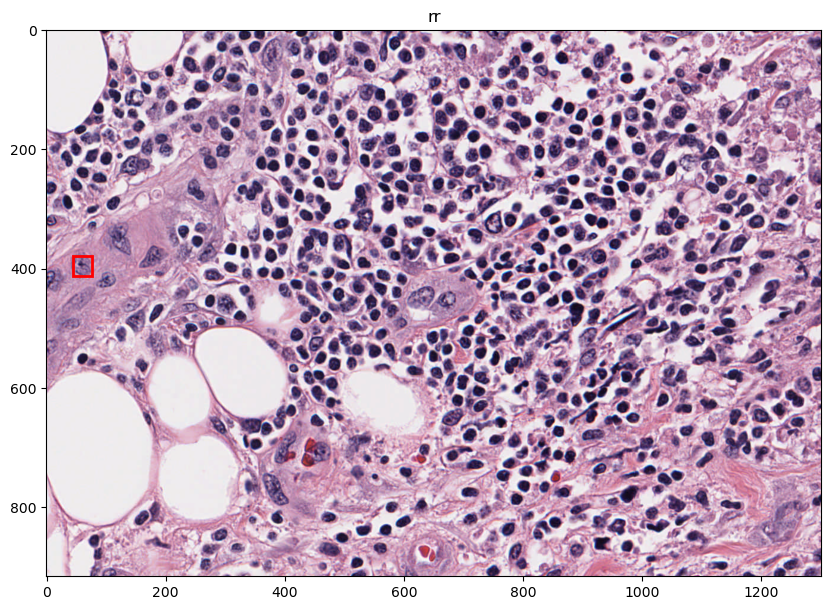

In [41]:
# from 110550130 import json_check_maskonimg
import json
with open('/home/bhg/visual_dl/lab3/results/0_res.json', 'r') as f:
    a = json.load(f)

json_check_maskonimg(a, 0, 'val_on_eval', 'xyxy')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
{'id': 110, 'file_name': '../dataset/train/1826f54c-5c06-49e5-b9e7-edac3920d07b/image.tif', 'height': 415, 'width': 477}
[{'id': 968, 'image_id': 110, 'category_id': 2, 'segmentation': {'size': [415, 477], 'counts': 'nT:8e<7K3M1O2N1O1O1O000100O2N1O2N1O1O2N1M`^_5'}, 'area': 328.5, 'bbox': [25, 21, 19, 25], 'iscrowd': 1}, {'id': 969, 'image_id': 110, 'category_id': 2, 'segmentation': {'size': [415, 477], 'counts': 'WYd03j<5L2N2O1N101O010O0001O00000000001O0O1O1O1O2N2MfYS5'}, 'area': 256.5, 'bbox': [50, 20, 24, 16], 'iscrowd': 1}, {'id': 970, 'image_id': 110, 'category_id': 2, 'segmentation': {'size': [415, 477], 'counts': 'oWo0:b<6L2N100O2N100001O0000001N1O2M2K6Llhj4'}, 'area': 290.5, 'bbox': [77, 37, 18, 22], 'iscrowd': 1}, {'id': 971, 'image_id': 110, 'category_id': 2, 'segmentation': {'size': [415, 477], 'counts': '[TT16g<2O101N2N2O0O2O000000000O1001O0000001O1N100O2Me^c4'}, 'area': 297.5, 'bbox': [89, 61

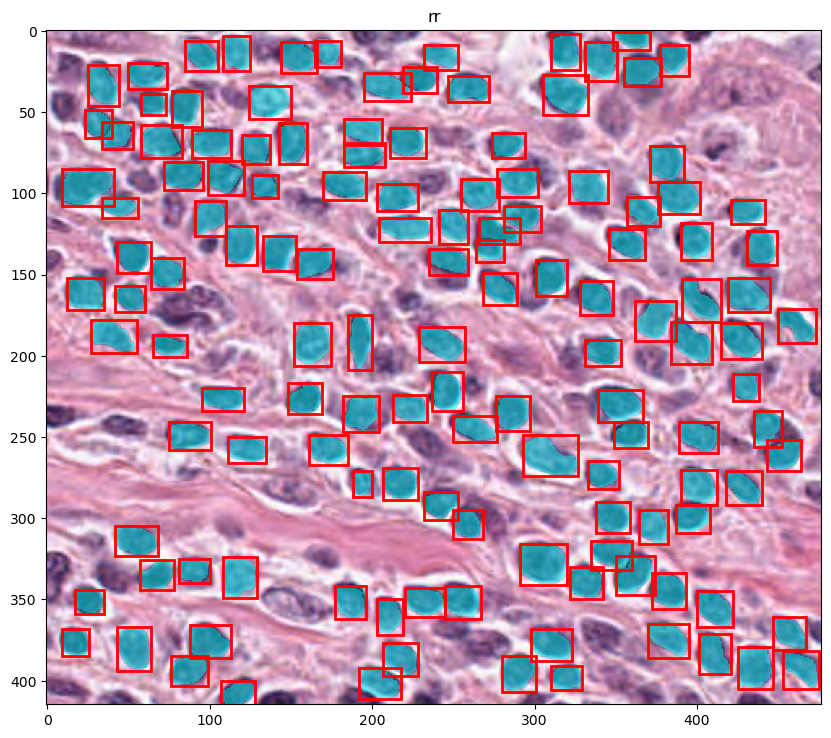

In [37]:
imgid = 110
cc=COCO('../dataset/val_coco.json')
img_info=cc.loadImgs(imgid)[0]
print(img_info)
imgAnn=cc.loadAnns(cc.getAnnIds(imgid))
print(imgAnn)

imgpath=img_info['file_name']
# print(imgpath)
img=cv2.imread(imgpath)
# print(img.shape)
imgtensor=T.ToTensor()(img)
# print(imgtensor.shape)
box=[b['bbox'] for b in imgAnn]
# print(f'before box: {box}')
boxtensor=torch.tensor(box)
print(f'box: {boxtensor.shape}')
seg=[decode_maskobj(b['segmentation']) for b in imgAnn]
mask=torch.tensor(seg)
print(mask.shape)

show_image_with_boxes_and_masks(imgtensor, boxtensor, 'xywh', mask, 'rr')